## Quantum Superdense Coding

Original notebook was developed by IBM; then adapted for latst QISKIT


## Introduction

Superdense coding is a protocol to transmit two classical bits of information using only one qubit. It was devised by Charles Bennett (IBM) and Stephen Wiesner in [1992](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.69.2881). 

This notebook was augmented based on Dr Charles Tappert presentation QC-ch2-p97-98  CS837 Class

The protocol starts out with a shared entangled state between the sender (Alice) and the receiver (Bob):
$$|\psi\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle)$$
The first qubit, denoted by subscript $A$, belongs to Alice and the second qubit, $B$, belongs to Bob.

In [41]:
import sys
import os
# Install qiskit package
#!pip install qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
from IPython.display import Image

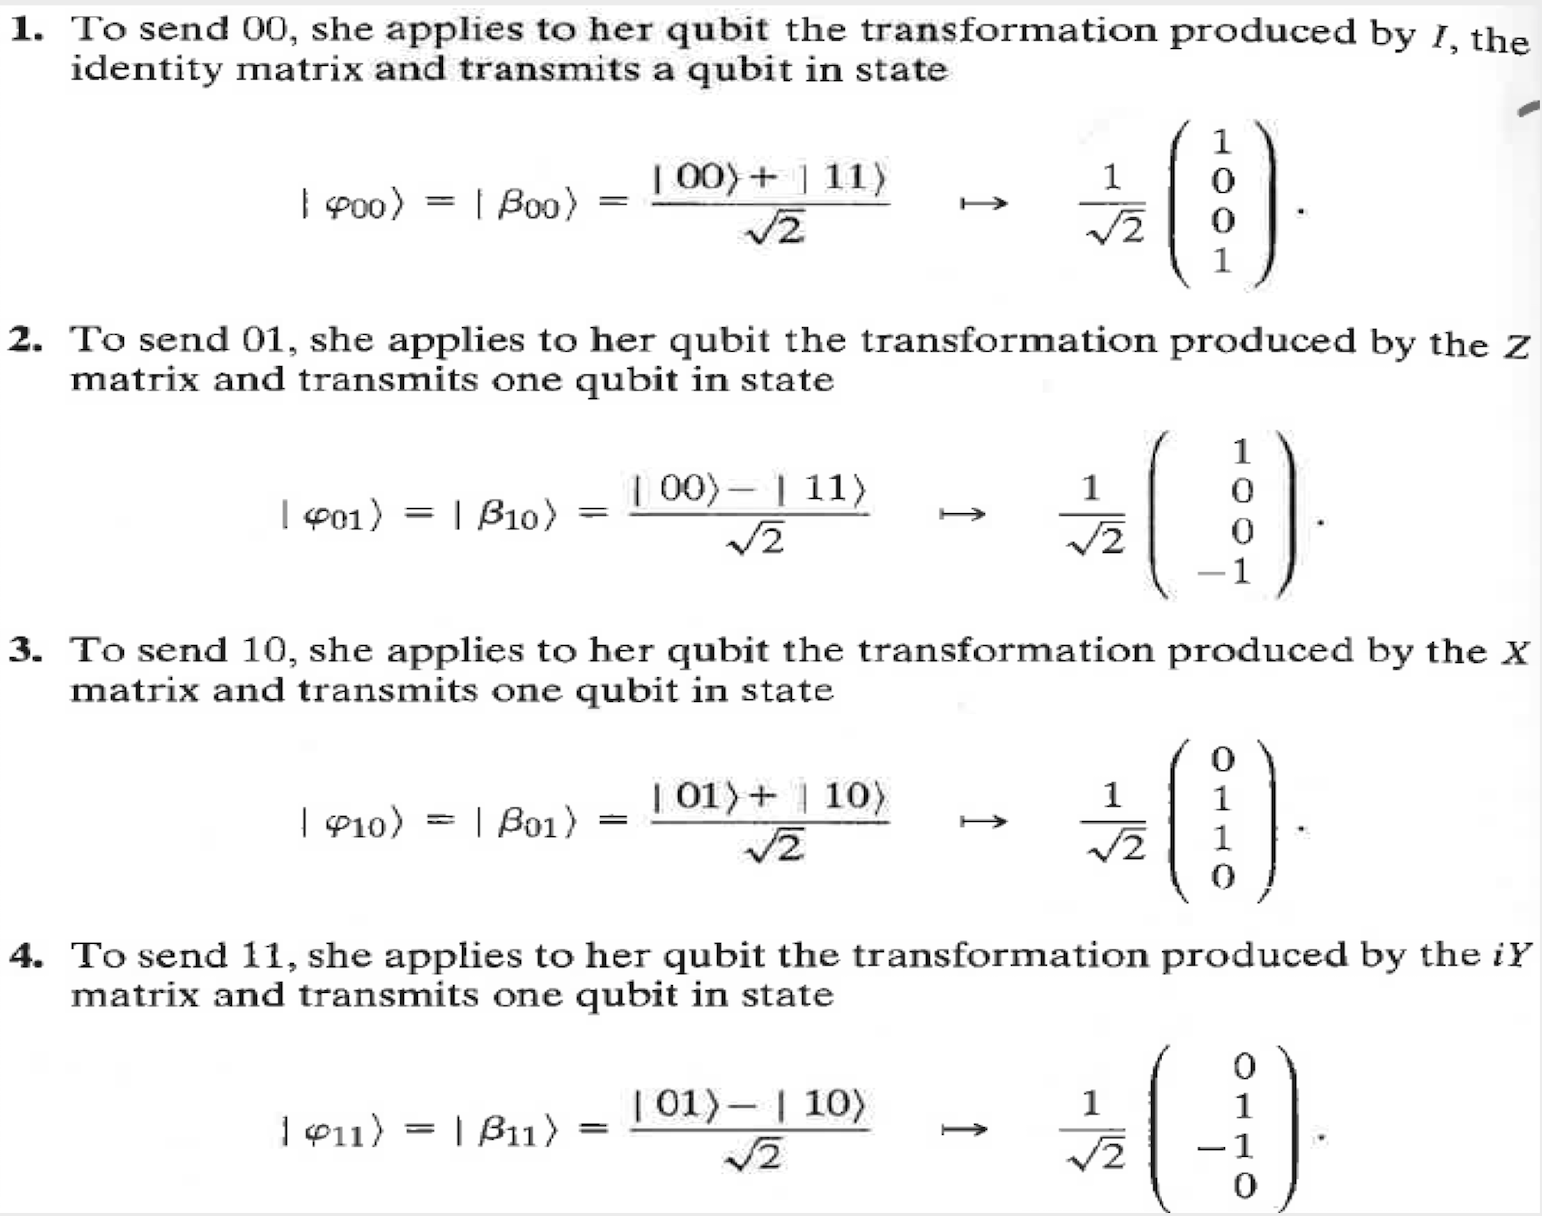

In [42]:
# Alice wants to send a two bit message to Bob, 00, 01, 10, or 11.
# She performs a single qubit operation on her qubit which transformsthe entangled state according 
# to which message she wants to send:
Image(filename='Superdense.png')

## Implementation

The first step is to import the required packages to run the Quantum Experience and set up our quantum program.
Also, add your API key and speciy the URL to IBM Quantum Experience Platform

In [43]:
from qiskit import IBMQ
IBMQ.enable_account('')

from qiskit.tools.visualization import plot_histogram

/usr/local/lib/python3.5/dist-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


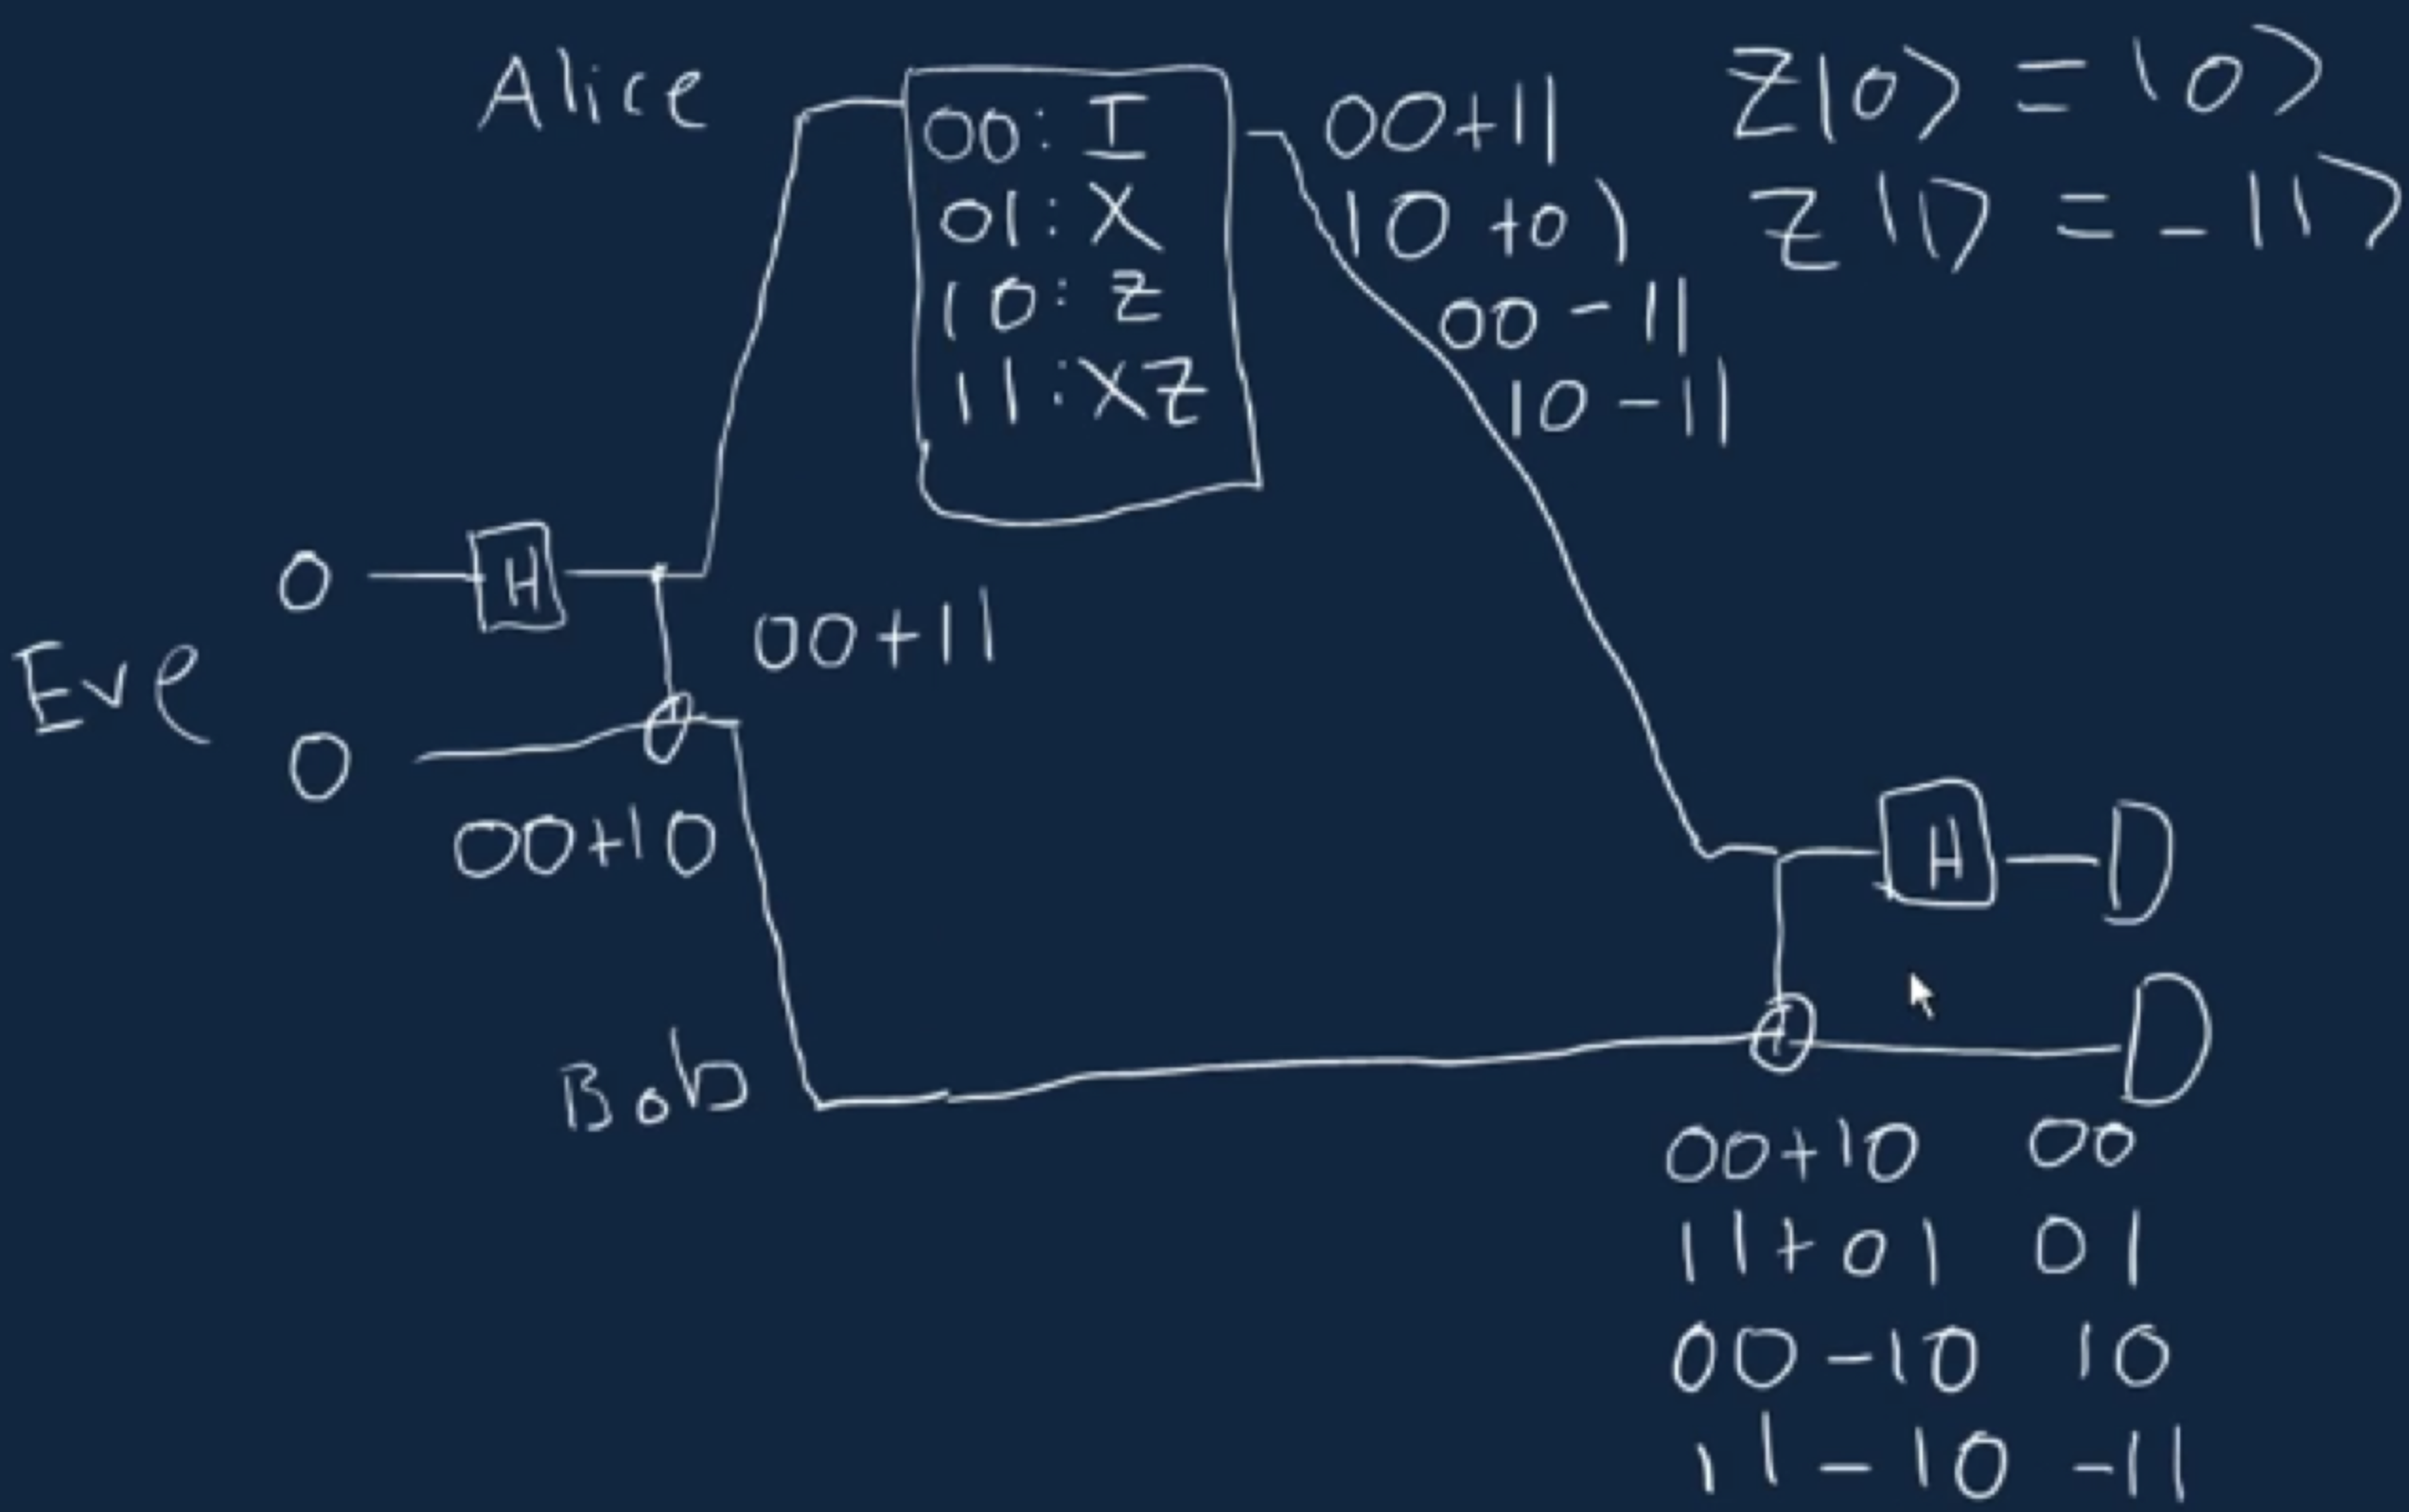

In [44]:
# The notebook implementation will be based on the drawing from teh Michael Nielsen video
Image(filename='Alice-Bob-SC.png')

Create the initial superposition snd entanglement, to  established the entangled state between Alice's qubit (q0) and Bob's qubit (q1)

(entanglement_revisited.ipynb), the steps to make the shared entangled state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0 0\rangle + |1 1\rangle)$ are:
1. Start with an initial state $|0 0\rangle$
2. Apply $H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ on $q_0$ 
3. Then a $CNOT = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\0& 0& 1 & 0\\0 & 1 & 0 & 0 \end{bmatrix}$ from $q_0$ to $q_1$

### BOB's Transformations

#### To receive, BOB applies a CNOT, then applies I⊗H

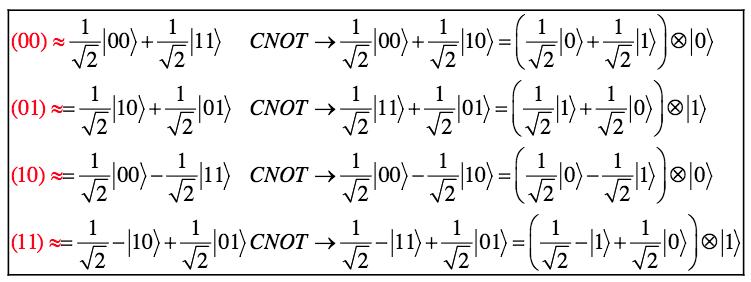

In [45]:
Image(filename='bob-t.png')

In [46]:
# Creating registers
q= QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Quantum circuit to make the shared entangled state is the following
superdense = QuantumCircuit(q, c)
superdense.h(q[0])
superdense.cx(q[0], q[1])
superdense.draw()

Alice now needs to decide what two bit message she wants to transmit to Bob, ($00$, $01$, $10$, or $11$), and perform the corresponding to transformation ($I$, $X$, $Z$ or $XZ$ respectively) to her qubit $q_1$ ($q_0$). In this case, she encodes $11$:

In [52]:
# Execute (send to BOB) on state (combination of 2 classic bits) only, such as 00 or 01 or 10 or 11

# For 00, do nothing

# Case A: For 01, apply $X$
# superdense.x(q[0])
# superdense.x(q[1])

# Case B: For 10, apply $Z$
# Write here the required GATE    like superdense.<Z-gate>(<qubit)
superdense.z(q[1])
# Case C: For 11, apply $XZ$
# superdense.x(q[0])
# superdense.x(q[1])
# superdense.z(q[1])
# Write here the required GATE    like superdense.<Z-gate>(<qubit)
# Write here the required GATE    like superdense.<X-gate>(<qubit)

Bob now needs to 'decode' the message that Alice sent him. Since measurement in the Quantum Experience is only possible in the standard computational basis, he does this by applying the gates in reverse order:
1. Applying a $CNOT$ from $q_1$ to $q_0$;     notation is < cx(q[0], q[1]) >
2. Then a $H$ on $q_0$;                       notation is < h(q[0]) >
3. And measuring $q_0$ and $q_1$;             notation is < measure(q[1], c[1]) >

In [53]:
superdense.cx(q[0], q[1])
superdense.h(q[0])
superdense.measure(q[0], c[0])
superdense.measure(q[1], c[1])

Let's now create, execute the quantum circuits, and plot the results:

In [54]:
from qiskit import execute
#backend = IBMQ.get_backend('ibmqx4', hub=None)
backend = IBMQ.get_backend('ibmq_qasm_simulator', hub=None)
#backend = 'ibmq_qasm_simulator'
from qiskit.tools.monitor import job_monitor
shots = 128           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 1        # Maximum number of credits to spend on executions. 

job_exp = execute(superdense, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

5c76dacdacdc760057f95f7e JobStatus.DONE
{'00': 66, '01': 62}


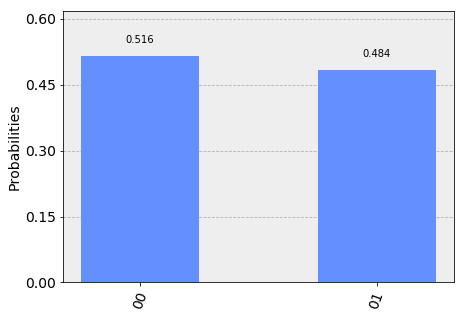

In [55]:
for ran_job in backend.jobs(limit=1
                        ):
    print(str(ran_job.job_id()) + " " + str(ran_job.status()))
    result = ran_job.result()
    counts = result.get_counts()
    print(counts)
plot_histogram(counts)

In [51]:
The state with the highest probability should match the message that Alice encoded.

SyntaxError: invalid syntax (<ipython-input-51-90cf3e3066fc>, line 1)

### Assignment 1.1
#### Test the outcome for encoded messages by Alice "10",  Case B above
#### Save your Jupyter Notebook, such as:  Superdense_<your_Name>_10.ipynb 

### Assignment 1.2
#### Test the outcome for encoded messages by Alice "11",  Case C above
#### Save your Jupyter Notebook, such as:  Superdense_<your_Name>_11.ipynb 
#### Create a ZIP file with both your ipynb notebooks and upload them to the provided "turn-it-in" link